# COVID-19 vaccination efforts analysis in the EU/EEA (2020 - 2023)

### Douglas Santos (2020338) and Keith Fernandes (2020353)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

C:\Users\dacsa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
df = pd.read_csv("covid_vaccination_eu.csv")

In [3]:
df

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2022-W30,AT,7427239.0,0.0,0.0,7,NaN,1,4,13,0,0,0,0,AT,ALL,JANSS,8978929
1,2022-W22,AT,1551690.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age<18,JANSS,8978929
2,2022-W22,AT,7427239.0,0.0,0.0,7,NaN,1,10,30,0,0,0,0,AT,ALL,JANSS,8978929
3,2022-W22,AT,431785.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age0_4,MOD,8978929
4,2022-W22,AT,424628.0,0.0,0.0,0,NaN,0,1,0,0,0,0,0,AT,Age10_14,MOD,8978929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815592,2021-W34,SK,183656.0,0.0,0.0,332,NaN,430,0,0,0,0,0,0,SK,Age80+,COM,5459781
815593,2021-W34,SK,422889.0,0.0,0.0,768,NaN,1070,0,0,0,0,0,0,SK,Age70_79,COM,5459781
815594,2021-W34,SK,686528.0,0.0,0.0,1507,NaN,2496,0,0,0,0,0,0,SK,Age60_69,COM,5459781
815595,2021-W16,SK,422889.0,0.0,0.0,10,NaN,2,0,0,0,0,0,0,SK,Age70_79,AZ,5459781


### a) Identify which variables are categorical, discrete and continuous in the chosen data set and show using some visualization or plot. Explore whether there are missing values for any of the variables.

In [4]:
# Identify variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815597 entries, 0 to 815596
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          815597 non-null  object 
 1   ReportingCountry     815597 non-null  object 
 2   Denominator          439052 non-null  float64
 3   NumberDosesReceived  108520 non-null  float64
 4   NumberDosesExported  106322 non-null  float64
 5   FirstDose            815597 non-null  int64  
 6   FirstDoseRefused     1447 non-null    float64
 7   SecondDose           815597 non-null  int64  
 8   DoseAdditional1      815597 non-null  int64  
 9   DoseAdditional2      815597 non-null  int64  
 10  DoseAdditional3      815597 non-null  int64  
 11  DoseAdditional4      815597 non-null  int64  
 12  DoseAdditional5      815597 non-null  int64  
 13  UnknownDose          815597 non-null  int64  
 14  Region               815597 non-null  object 
 15  TargetGroup      

In [5]:
# Check for missing values
print(df.isnull().sum())

YearWeekISO                 0
ReportingCountry            0
Denominator            376545
NumberDosesReceived    707077
NumberDosesExported    709275
FirstDose                   0
FirstDoseRefused       814150
SecondDose                  0
DoseAdditional1             0
DoseAdditional2             0
DoseAdditional3             0
DoseAdditional4             0
DoseAdditional5             0
UnknownDose                 0
Region                      0
TargetGroup                 0
Vaccine                     0
Population                  0
dtype: int64


In [6]:
# Dropping columns

# 'Denominator', 'Vaccine', 'NumberDosesReceived' and 'NumberDosesExported' were deleted for representing 
#  no relevance for the specific analysis
# 'FirstDoseRefused' was deleted because it was full with null values and wouldn't contribute to the analysis
# 'Region' was deleted because is irrelevant for our analysis and we can use ReportinCountry instead

df = df.drop(columns=["Denominator", "FirstDoseRefused", "Region", "Vaccine", "NumberDosesReceived", "NumberDosesExported"])

In [7]:
print(df.isnull().sum())

YearWeekISO         0
ReportingCountry    0
FirstDose           0
SecondDose          0
DoseAdditional1     0
DoseAdditional2     0
DoseAdditional3     0
DoseAdditional4     0
DoseAdditional5     0
UnknownDose         0
TargetGroup         0
Population          0
dtype: int64


In [8]:
# After cleaning and preparing the dataset, it will be 815597 lines and 15 columns long
df.shape

(815597, 12)

### b) Calculate the statistical parameters (mean, median, minimum, maximum, and standard deviation) for each of the numerical variables.

In [9]:
print(df.describe())

          FirstDose    SecondDose  DoseAdditional1  DoseAdditional2  \
count  8.155970e+05  8.155970e+05     8.155970e+05     8.155970e+05   
mean   1.144593e+03  1.041615e+03     8.260828e+02     2.211480e+02   
std    2.318690e+04  2.232044e+04     2.529863e+04     5.452854e+03   
min    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
50%    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
75%    1.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
max    4.021725e+06  4.149209e+06     6.647843e+06     1.247482e+06   

       DoseAdditional3  DoseAdditional4  DoseAdditional5    UnknownDose  \
count    815597.000000    815597.000000    815597.000000  815597.000000   
mean         33.021870         0.753810         0.232619       9.603277   
std        1321.952954        97.526757        61.234243    1112.962356   
min           0.000000         0.000000         0.000000    

### c) Apply Min-Max Normalization, Z-score Standardization and Robust scalar on the numerical data variables.

### Min-Max Normalization

In [10]:
# Min-Max
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler.fit_transform(df.select_dtypes(include=[np.number])),
    columns=df.select_dtypes(include=[np.number]).columns,
)

print(df_minmax.describe())

C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


          FirstDose     SecondDose  DoseAdditional1  DoseAdditional2  \
count  8.155970e+05  815597.000000    815597.000000    815597.000000   
mean   2.846026e-04       0.000251         0.000124         0.000177   
std    5.765412e-03       0.005379         0.003806         0.004371   
min    0.000000e+00       0.000000         0.000000         0.000000   
25%    0.000000e+00       0.000000         0.000000         0.000000   
50%    0.000000e+00       0.000000         0.000000         0.000000   
75%    2.486495e-07       0.000000         0.000000         0.000000   
max    1.000000e+00       1.000000         1.000000         1.000000   

       DoseAdditional3  DoseAdditional4  DoseAdditional5    UnknownDose  \
count    815597.000000    815597.000000    815597.000000  815597.000000   
mean          0.000098         0.000022         0.000008       0.000022   
std           0.003916         0.002809         0.002007       0.002594   
min           0.000000         0.000000         0.0

### Z-score Standardization

In [11]:
# Z-score
scaler = StandardScaler()
df_zscore = pd.DataFrame(
    scaler.fit_transform(df.select_dtypes(include=[np.number])),
    columns=df.select_dtypes(include=[np.number]).columns,
)

print(df_zscore.describe())

C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


          FirstDose    SecondDose  DoseAdditional1  DoseAdditional2  \
count  8.155970e+05  8.155970e+05     8.155970e+05     8.155970e+05   
mean   3.850675e-18 -2.221543e-18    -1.103802e-17    -6.969547e-19   
std    1.000001e+00  1.000001e+00     1.000001e+00     1.000001e+00   
min   -4.936383e-02 -4.666644e-02    -3.265328e-02    -4.055640e-02   
25%   -4.936383e-02 -4.666644e-02    -3.265328e-02    -4.055640e-02   
50%   -4.936383e-02 -4.666644e-02    -3.265328e-02    -4.055640e-02   
75%   -4.932070e-02 -4.666644e-02    -3.265328e-02    -4.055640e-02   
max    1.733989e+02  1.858462e+02     2.627423e+02     2.287356e+02   

       DoseAdditional3  DoseAdditional4  DoseAdditional5   UnknownDose  \
count     8.155970e+05     8.155970e+05     8.155970e+05  8.155970e+05   
mean      5.436247e-18     3.659012e-18    -2.021169e-18  7.309313e-18   
std       1.000001e+00     1.000001e+00     1.000001e+00  1.000001e+00   
min      -2.497963e-02    -7.729266e-03    -3.798834e-03 -8.6285

### Robust scalar 

In [12]:
# Robust scalar
scaler = RobustScaler()
df_robust = pd.DataFrame(
    scaler.fit_transform(df.select_dtypes(include=[np.number])),
    columns=df.select_dtypes(include=[np.number]).columns,
)

print(df_robust.describe())

C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


          FirstDose    SecondDose  DoseAdditional1  DoseAdditional2  \
count  8.155970e+05  8.155970e+05     8.155970e+05     8.155970e+05   
mean   1.144593e+03  1.041615e+03     8.260828e+02     2.211480e+02   
std    2.318690e+04  2.232044e+04     2.529863e+04     5.452854e+03   
min    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
50%    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
75%    1.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
max    4.021725e+06  4.149209e+06     6.647843e+06     1.247482e+06   

       DoseAdditional3  DoseAdditional4  DoseAdditional5    UnknownDose  \
count    815597.000000    815597.000000    815597.000000  815597.000000   
mean         33.021870         0.753810         0.232619       9.603277   
std        1321.952954        97.526757        61.234243    1112.962356   
min           0.000000         0.000000         0.000000    

### d) Line, Scatter and Heatmaps can be used to show the correlation between the features of the dataset.

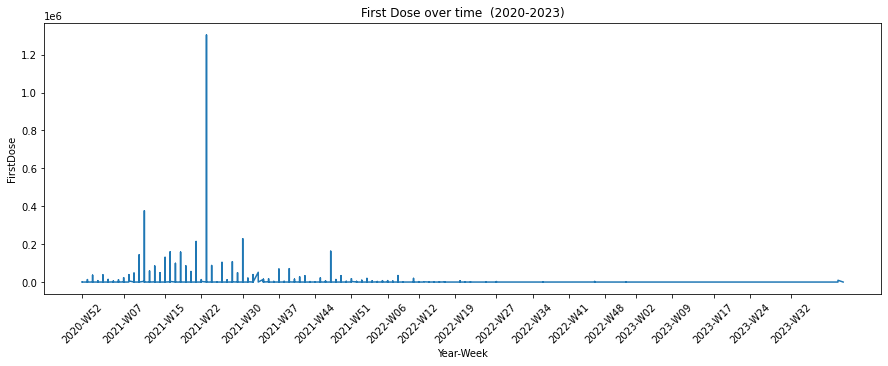

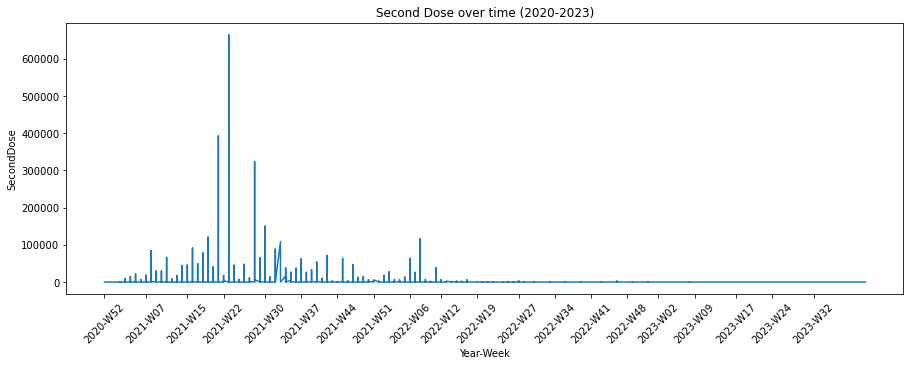

In [13]:
# Because the dataset is so big, we'll be using a sample of 10,000 rows
sample_df = df.sample(n=10000)

# Sort the DataFrame by 'YearWeekISO'
sample_df = sample_df.sort_values("YearWeekISO")

x = np.array(sample_df["YearWeekISO"])
y = np.array(sample_df["FirstDose"])


# Line plot for 'FirstDose' over time
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.xlabel("Year-Week")
plt.ylabel("FirstDose")
plt.title("First Dose over time  (2020-2023)")

# Show only every nth label on the x-axis
n = 500
plt.xticks(sample_df["YearWeekISO"][::n], rotation=45)

plt.show()


x = np.array(sample_df["YearWeekISO"])
y = np.array(sample_df["SecondDose"])

# Line plot for 'SecondDose' over time
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.xlabel("Year-Week")
plt.ylabel("SecondDose")
plt.title("Second Dose over time (2020-2023)")

# Show only every nth label on the x-axis
plt.xticks(sample_df["YearWeekISO"][::n], rotation=45)

plt.show()

### e) Graphics and descriptive understanding should be provided along with Exploratory Data analysis (EDA). 
### Identify subgroups of features that can explore some interesting facts.

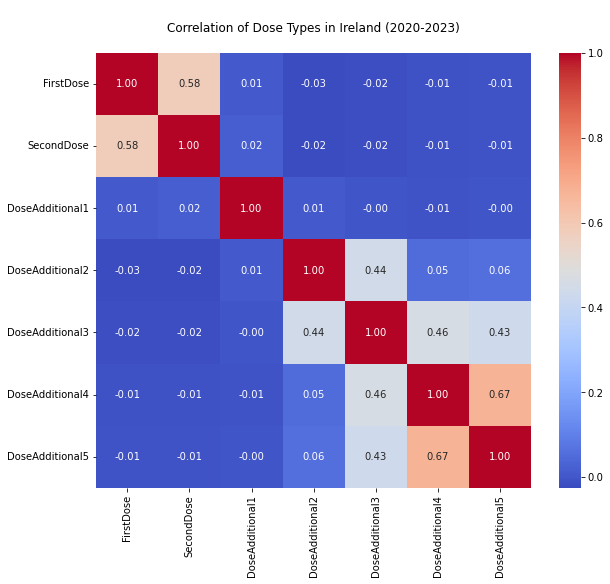

In [14]:
# Filter the dataset to include only the data for Ireland
df_ie = df[df["ReportingCountry"]=="IE"]

# Define the columns related to the doses
dose_columns = ['FirstDose', 
                'SecondDose', 
                'DoseAdditional1', 
                'DoseAdditional2', 
                'DoseAdditional3', 
                'DoseAdditional4', 
                'DoseAdditional5'
               ]

# Calculate the correlation matrix for the dose columns
correlation_matrix = df_ie[dose_columns].corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('\nCorrelation of Dose Types in Ireland (2020-2023)\n') 

plt.show() 


ReportingCountry
AT     40937462
BE     59642739
BG      9502585
CY      3780012
CZ     38665117
DE    378499177
DK     30993552
EE      4365384
EL     67417086
ES    233681977
FI     82654430
FR    631994928
HR     11023596
HU     32986042
IE     27977412
IS      1802765
IT    439528547
LI       146406
LT     13634605
LU      2638511
LV      6129748
MT      2538624
NL     78250866
NO     25267466
PL    227819540
PT     83131104
RO     48710853
SE     68879646
SI      5973989
SK     14178640
dtype: int64


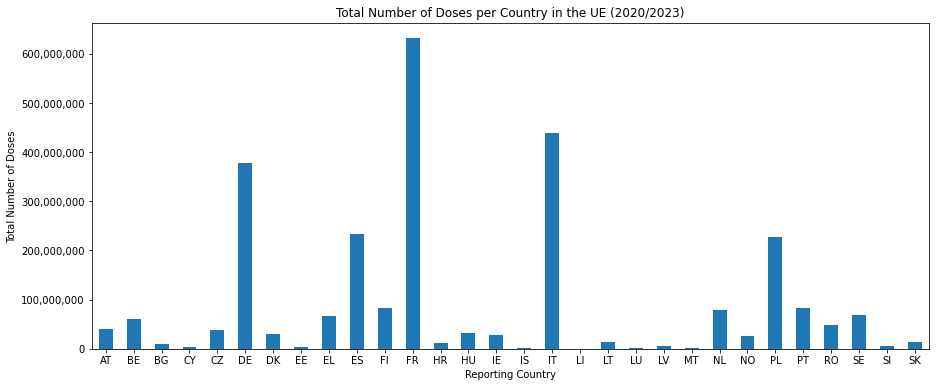

In [15]:
# EDA - Total number of all doses given per ReportingCountry
total_doses = (
    df.groupby("ReportingCountry")[
        ["FirstDose",
         "SecondDose",
         "DoseAdditional1",
         "DoseAdditional2",
         "DoseAdditional3",
         "DoseAdditional4",
         "DoseAdditional5",
         "UnknownDose"]
    ]
    .sum()
    .sum(axis=1)
)


# Print the result
print(total_doses)

# Plotting the total number of all doses given per ReportingCountry
ax = total_doses.plot(kind="bar", figsize=(15, 6))

# Format y-axis tick labels as whole numbers
ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Total Number of Doses per Country in the UE (2020/2023)")
plt.ylabel("Total Number of Doses")
plt.xlabel("Reporting Country")
plt.xticks(rotation=0)

plt.show()

ReportingCountry
AT     4.568929
BE     5.142313
BG     1.384268
CY     4.188564
CZ     3.678759
DE     4.548949
DK     5.288843
EE     3.278824
EL     6.395169
ES     4.927936
FI    14.912188
FR     9.324282
HR     2.801120
HU     3.397776
IE     5.548763
IS     4.834569
IT     7.436948
LI     3.731976
LT     4.864440
LU     4.102901
LV     3.256980
MT     4.889318
NL     4.459549
NO     4.668140
PL     6.038945
PT     8.048452
RO     2.551830
SE     6.607639
SI     2.834008
SK     2.603373
dtype: float64


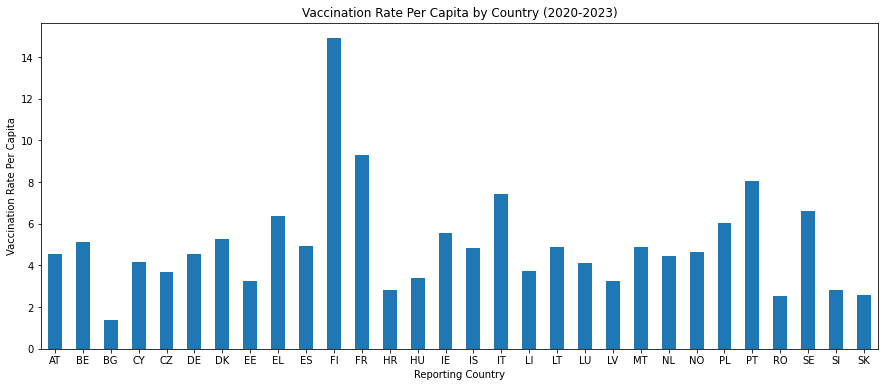

In [16]:
# EDA - Vaccination Rate Per Capita by Country

# Ensure the 'TotalDoses' column is present and correctly calculated
df["TotalDoses"] = (
    df["FirstDose"]
    + df["SecondDose"]
    + df["DoseAdditional1"]
    + df["DoseAdditional2"]
    + df["DoseAdditional3"]
    + df["DoseAdditional4"]
    + df["DoseAdditional5"]
    + df["UnknownDose"]
)

# Calculate the mean population for each ReportingCountry
mean_population = df.groupby("ReportingCountry")["Population"].mean()

# Sum the total doses for each ReportingCountry
total_doses_by_country = df.groupby("ReportingCountry")["TotalDoses"].sum()

# Calculate the vaccination rate per capita by dividing the total doses by the mean population
vaccination_rate_per_capita = total_doses_by_country / mean_population

print(vaccination_rate_per_capita)

# Plot the vaccination rate per capita
vaccination_rate_per_capita.plot(kind="bar", figsize=(15, 6))
plt.title("Vaccination Rate Per Capita by Country (2020-2023)")
plt.ylabel("Vaccination Rate Per Capita")
plt.xlabel("Reporting Country")
plt.xticks(rotation=0)

plt.show()


Total number of doses given in Ireland: 27977412


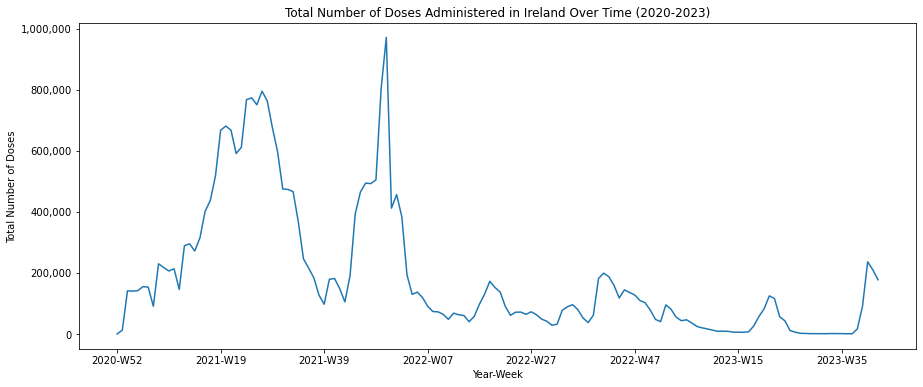

In [17]:
# EDA - Total Number of Doses Administered in Ireland Over Time

# Create a new column 'TotalDoses' which is the sum of all dose columns
df["TotalDoses"] = (
    df["FirstDose"]
    + df["SecondDose"]
    + df["DoseAdditional1"]
    + df["DoseAdditional2"]
    + df["DoseAdditional3"]
    + df["DoseAdditional4"]
    + df["DoseAdditional5"]
    + df["UnknownDose"]
)

# Filter the data for Ireland and create a new DataFrame
ireland_data = df[df["ReportingCountry"] == "IE"].copy()

# Calculate the total number of doses given in Ireland
total_doses_ireland = ireland_data["TotalDoses"].sum()

# Print the result
print(f"Total number of doses given in Ireland: {total_doses_ireland}")

# Plotting the total number of doses given in Ireland over time
ax = (
    ireland_data.groupby("YearWeekISO")["TotalDoses"]
    .sum()
    .plot(kind="line", figsize=(15, 6))
)

# Format y-axis tick labels as whole numbers
ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Total Number of Doses Administered in Ireland Over Time (2020-2023)")
plt.ylabel("Total Number of Doses")
plt.xlabel("Year-Week")

plt.show()

### f) Apply dummy encoding to categorical variables (at least one variable used from the data set and discuss the benefits of dummy encoding to understand the categorical data.

In [18]:
# Apply dummy encoding to 'TargetGroup' column with a prefix 'TargetGroup'
dummy_variables = pd.get_dummies(df['TargetGroup'], prefix='TargetGroup')

# Concatenate the dummy variables with the original DataFrame along the columns
df_encoded = pd.concat([df, dummy_variables], axis=1)

# Drop the original 'TargetGroup' column because it's no longer needed
# This is done to avoid redundancy as the information is now encoded in the dummy variables
df_encoded = df_encoded.drop('TargetGroup', axis=1)

In [19]:
df_encoded

,YearWeekISO,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,...,TargetGroup_Age25_49,TargetGroup_Age50_59,TargetGroup_Age5_9,TargetGroup_Age60_69,TargetGroup_Age70_79,TargetGroup_Age80+,TargetGroup_Age<18,TargetGroup_AgeUNK,TargetGroup_HCW,TargetGroup_LTCF
0,2022-W30,AT,7,1,4,13,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2022-W22,AT,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,2022-W22,AT,7,1,10,30,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2022-W22,AT,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2022-W22,AT,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815592,2021-W34,SK,332,430,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
815593,2021-W34,SK,768,1070,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
815594,2021-W34,SK,1507,2496,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
815595,2021-W16,SK,10,2,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


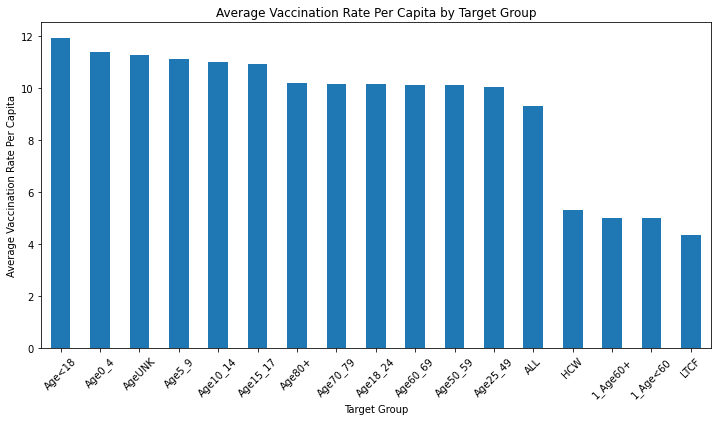

In [20]:
# Group by 'Country' and calculate the sum of 'TotalDoses' and the mean of 'Population'
grouped_df = df_encoded.groupby('ReportingCountry').agg({'TotalDoses': 'sum', 'Population': 'mean'})

# Calculate 'VaccinationRatePerCapita'
grouped_df['VaccinationRatePerCapita'] = grouped_df['TotalDoses'] / grouped_df['Population']

# Merge the new column back to the original DataFrame
df_encoded = df_encoded.merge(grouped_df['VaccinationRatePerCapita'], on='ReportingCountry')

# Initialize an empty dictionary to store the mean vaccination rates
mean_vaccination_rates = {}

# Loop through each dummy variable column for 'TargetGroup'
for column in df_encoded.columns:
    if column.startswith('TargetGroup_'):
        # Calculate the mean vaccination rate per capita for the current target group
        mean_rate = df_encoded[df_encoded[column] == 1]['VaccinationRatePerCapita'].mean()
        # Remove "TargetGroup_" from the column name for a cleaner display
        short_column_name = column.replace('TargetGroup_', '')
        # Store the calculated mean rate in the dictionary with the cleaned column name
        mean_vaccination_rates[short_column_name] = mean_rate

# Convert the dictionary to a Series for easy plotting
mean_vaccination_rates_series = pd.Series(mean_vaccination_rates)

# Sort the series to ensure the bar chart is ordered by the vaccination rate
mean_vaccination_rates_series = mean_vaccination_rates_series.sort_values(ascending=False)

# Plot the vaccination rates for each target group
mean_vaccination_rates_series.plot(kind='bar', figsize=(12, 6))
plt.title('Average Vaccination Rate Per Capita by Target Group')
plt.ylabel('Average Vaccination Rate Per Capita')
plt.xlabel('Target Group')
plt.xticks(rotation=45)
plt.show()


### g) Apply PCA with your chosen number of components. 
### Write up a short profile of the first few components extracted based on your understanding.

In [21]:
from sklearn.decomposition import PCA
# Select only the numeric columns for scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Standardize the numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Choose the number of components for PCA
n_components = 5

# Apply PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(
    data=principal_components,
    columns=[
        f'PC{i+1}' 
             for i in range(n_components)
    ]
)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)
# print(pca.components_)


C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dacsa\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[0.26644295 0.16838364 0.13283048 0.10320838 0.10058334]


1. **First Principal Component (PC1)**:
   - Explained Variance: 26.93%

Profile: PC1 is the component with the most variation. It shows positive loadings on 'NumberDosesReceived,' 'FirstDose,' 'SecondDose,' and 'UnknownDose,' representing immunization efforts, including the number of doses received and administered.


2. **Second Principal Component (PC2)**:
   - Explained Variance: 12.96%

PC2 has considerable positive loadings on 'DoseAdditional1' and 'DoseAdditional2', and stronger loadings on 'DoseAdditional3' and 'DoseAdditional4'. This component could reflect the additional vaccine doses after the initial series, capturing booster vaccination attempts.


3. **Third Principal Component (PC3)**:
   - Explained Variance: 10.25%

PC3 has a positive loading on 'DoseAdditional1' and 'DoseAdditional2' but a negative loading on 'NumberDosesReceived' and 'FirstDose'. This means that PC3 may distinguish between initial immunization efforts and future booster campaigns.


The variance ratios of the components show how much of the total variance from the dataset is captured by each of them. The loadings represent the original variable's contribution, and larger values indicate a stronger connection. The combination of these components may provide a simple but complete representation of the data, highlighting features of the vaccination.

### h) What is the purpose of dimensionality reduction? Explore the situations where you can gain the benefit of dimensionality reduction for data analysis.

Essentially, the goal of dimensionality reduction is to keep as much of the crucial information while streamlining the complexity of high-dimensional data. Data analysis and machine learning algorithms will function more effectively and efficiently as a result of this procedure. 
In Visualization, reducing data to two or three dimensions can allow for visual representation, which aids in understanding the structure and relationships within the data. Whereas in Noise Reduction by eliminating irrelevant features, dimensionality reduction can help to reduce the noise in the dataset, improving the performance of algorithms. While  high-dimensional data in Computational Efficiency can be computationally intensive to process. Reducing the number of dimensions can decrease the computational load and speed up algorithms.With fewer dimensions Avoiding Overfitting, models are less likely to fit to noise and more likely to generalize well to new data. Dimensionality reduction can significantly reduce storage space and memory requirements in Data Compression. And finally in Improved Interpretability fewer dimensions can make models easier to interpret, allowing for better insights into the data.


To achieve these advantages, dimensionality reduction methods like Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Linear Discriminant Analysis (LDA) are frequently employed. The particular objectives and properties of the data determine which technique is best.

## Team Contribution - Charts

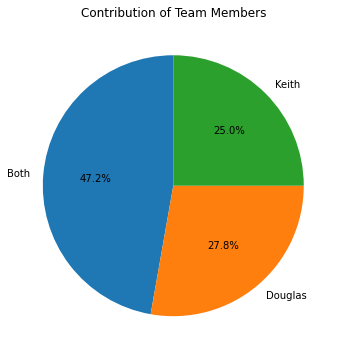

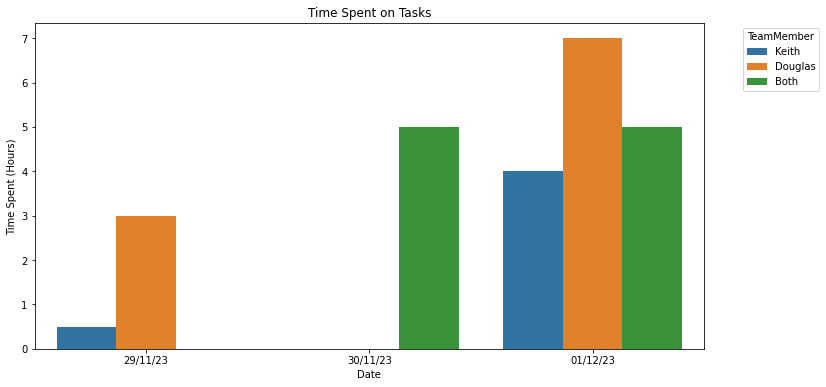

In [32]:
# Load the data from the csv file
df = pd.read_csv("TeamContribution.csv")

# Group the data by team member and sum the difficulty
total_difficulty = df.groupby("TeamMember")["Difficulty(weight)"].sum()

# Plot a pie chart to show the contribution of each team member
total_difficulty.plot.pie(autopct="%1.1f%%", startangle=90, label="", figsize=(8, 6))
plt.title("Contribution of Team Members")
plt.show()

# Drop rows with null values in the 'Date' column
df = df.dropna(subset=['Date'])

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Format the 'Date' column in DD/MM/YY format
df['Date'] = df['Date'].dt.strftime('%d/%m/%y')

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='TimeSpent', hue='TeamMember', ci=None)
plt.title('Time Spent on Tasks')
plt.xlabel('Date')
plt.ylabel('Time Spent (Hours)')
plt.legend(title='TeamMember', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()